In [1]:
#Import Packages 

import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Read in data 

with open(r'web_log_file.txt', 'r') as file:
    web_log =  file.read().replace('\n', ' ')


# What Browsers are Being Used to Access the Site?

In [6]:
# Establish pattern to search for and find counts of browsers

pattern = '\w+/\d+\.\d+\" \"'
Browser = re.findall(pattern, web_log)
Brow_Count = Counter(Browser)
Brow_Count.most_common(10)

[('Firefox/34.0" "', 5165),
 ('Safari/537.36" "', 3833),
 ('Safari/601.1" "', 1406),
 ('Firefox/43.0" "', 1303),
 ('urllib/2.7" "', 457),
 ('urllib/1.17" "', 368),
 ('Firefox/29.0" "', 354),
 ('Firefox/42.0" "', 316),
 ('Safari/537.11" "', 258),
 ('Edge/13.10586" "', 212)]

Text(0.5, 1.0, 'Top 10 Browsers')

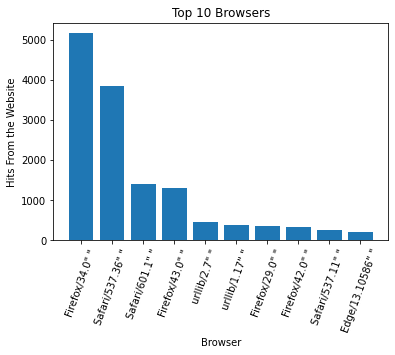

In [7]:
#Convert list to dataframe and graph the number of times each browser was used

Browser_df = pd.DataFrame.from_dict(Brow_Count, orient='index').reset_index()
Browser_df = Browser_df.rename(columns={'index':'Browser', 0:'count'})
Browser_sorted = Browser_df.sort_values(by=['count'], ascending = False)
Browser_top_10 = Browser_sorted.head(10)
plt.bar(Browser_top_10['Browser'], Browser_top_10['count'])
plt.xticks(rotation=70)
#plt.tick_params(labelbottom=False)
plt.xlabel('Browser')
plt.ylabel('Hits From the Website')
plt.title('Top 10 Browsers')

In [8]:
Browser_top_10

,Browser,count
0,"Firefox/34.0"" """,5165
1,"Safari/537.36"" """,3833
3,"Safari/601.1"" """,1406
23,"Firefox/43.0"" """,1303
57,"urllib/2.7"" """,457
56,"urllib/1.17"" """,368
37,"Firefox/29.0"" """,354
5,"Firefox/42.0"" """,316
20,"Safari/537.11"" """,258
44,"Edge/13.10586"" """,212


# 
The top 5 Browsers used to access the site are Mozilla 5.0, Mozilla 4.0, Opera 9.80, DoCoMo 2.0, and Bot 0.1. Mozilla 5.0 is by far the most common browser used to access teh site, with 18719 occurences. 

# What Websites/IP Addresses Bring this Website the Most Traffic?

In [79]:
#Establish pattern to search for and find all instances

pattern1 = '(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'
IP = re.findall(pattern1, web_log)

In [81]:
#Get counts of each IP address and observe top 5 IP addresses

IP_count = Counter(IP)
IP_count.most_common(5)

[('148.251.50.49', 1929),
 ('52.22.118.215', 734),
 ('213.150.254.81', 434),
 ('37.1.206.196', 433),
 ('84.112.161.41', 376)]

Text(0.5, 1.0, 'Top 10 IP Addresses')

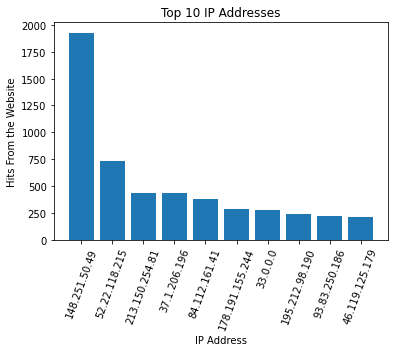

In [82]:
# Convert list to dataframe and graph the most used IP addresses

IP_df = pd.DataFrame.from_dict(IP_count, orient='index').reset_index()
IP_df = IP_df.rename(columns={'index':'IP', 0:'count'})
IP_sorted = IP_df.sort_values(by=['count'], ascending = False)
IP_top_10 = IP_sorted.head(10)
plt.bar(IP_top_10['IP'], IP_top_10['count'])
plt.xticks(rotation=70)
#plt.tick_params(labelbottom=False)
plt.xlabel('IP Address')
plt.ylabel('Hits From the Website')
plt.title('Top 10 IP Addresses')

Top 5 IP Addresses: 
1. 148.251.50.49
2. 52.22.118.215
3. 213.150.254.81
4. 37.1.206.196
5. 84.112.161.41

The IP Address 148.251.50.49 is by far the most accessed IP address with 1929 uses.

# 
Check what websites are referring to this site:

In [83]:
#Establish pattern to find top referring websites

pattern2 = 'http://\S+'
referred = re.findall(pattern2, web_log)

In [84]:
#Get count of most referred websites

refer_count = Counter(referred)
refer_count.most_common(10)

[('http://www.almhuette-raith.at/"', 3156),
 ('http://www.almhuette-raith.at/index.php?option=com_phocagallery&view=category&id=1&Itemid=53"',
  2691),
 ('http://almhuette-raith.at/administrator/"', 2576),
 ('http://almhuette-raith.at/"', 1440),
 ('http://www.almhuette-raith.at/index.php?option=com_phocagallery&view=category&id=1:almhuette-raith&Itemid=53"',
  798),
 ('http://almhuette-raith.at/administrator/index.php"', 532),
 ('http://www.almhuette-raith.at/index.php?option=com_phocagallery&view=category&id=4:ferienwohnung2&Itemid=53"',
  484),
 ('http://www.bing.com/bingbot.htm)"', 425),
 ('http://www.almhuette-raith.at/index.php?option=com_content&view=article&id=49&Itemid=55"',
  398),
 ('http://www.almhuette-raith.at/index.php?option=com_phocagallery&view=category&id=2:winterfotos&Itemid=53"',
  379)]

Text(0.5, 1.0, 'Top 10 Referring Websites')

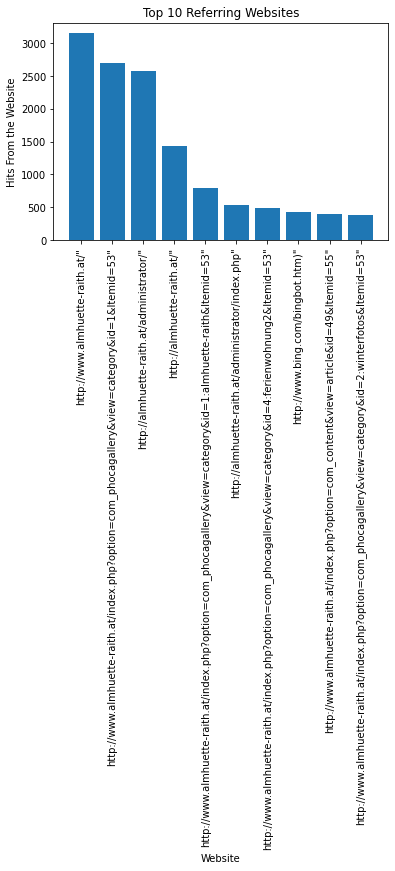

In [86]:
# Covnert list of referred websites to datafram and graph the top referring websites

referred_df = pd.DataFrame.from_dict(refer_count, orient='index').reset_index()
referred_df = referred_df.rename(columns={'index':'Site', 0:'count'})
referred_sorted = referred_df.sort_values(by=['count'], ascending = False)
referred_top_10 = referred_sorted.head(10)
plt.bar(referred_top_10['Site'], referred_top_10['count'])
plt.xticks(rotation=90)
#plt.tick_params(labelbottom=False)
plt.xlabel('Website')
plt.ylabel('Hits From the Website')
plt.title('Top 10 Referring Websites')

#
It seems that the majority of the users accessing the website are doing so through the "www.almhuette-raith.at" website, on various different pages of the website 

# Are There Specific Times of the Year That the Website Recieves More Traffic Than Other Times?

In [87]:
# Establish pattern to isolate the dates and access times

pattern3 = '(\d{1,2}\/\w{3}\/\d{4})'
dates = re.findall(pattern3, web_log)

In [89]:
# Get counts of each date and convert the strings to datetime format

dates_list = [datetime.strptime(date, '%d/%b/%Y').date() for date in dates]
dates_count = Counter(dates_list)

Text(0, 0.5, 'Number of Hits')

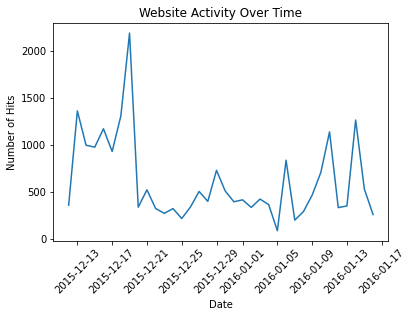

In [90]:
# Convert list of dates to dataframe and graph the number of hits at each date

dates_df = pd.DataFrame.from_dict(dates_count, orient='index').reset_index()
dates_df = dates_df.rename(columns={'index':'date', 0:'count'})
plt.plot(dates_df['date'], dates_df['count'])
plt.xticks(rotation=45)
plt.title('Website Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Hits')

In [91]:
# find most common dates

dates_count.most_common(5)

[(datetime.date(2015, 12, 19), 2189),
 (datetime.date(2015, 12, 13), 1361),
 (datetime.date(2015, 12, 18), 1307),
 (datetime.date(2016, 1, 14), 1264),
 (datetime.date(2015, 12, 16), 1171)]

# 
We can see from the graph that early December has the most number of hits per day on the website, with the highest hits in a day being on 12/19/2015 at 2189 hits.

# Is there Evidence of Malicious Intent to Alter the Site?

In [92]:
# Import all activity in the log from December 19th only, as it was the most accessed day

with open(r'december19.txt', 'r') as file:
    dec19 =  file.read().replace('\n', ' ')

In [93]:
# find instances fo GET and POST
pattern4 = '"[A-Z]{3,4} '
get = re.findall(pattern4, dec19)

In [94]:
# Number of Get vs Post attempts
Counter(get)

Counter({'"GET ': 1227, '"POST ': 962})

In [95]:
# Most frequent IP address for December 19th

pattern5 = '(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})'
IP19DEC = re.findall(pattern5, dec19)
Counter(IP19DEC).most_common(5)

[('148.251.50.49', 1929),
 ('80.109.215.211', 72),
 ('177.42.7.158', 37),
 ('39.57.56.153', 34),
 ('89.144.201.159', 33)]

# 
We can see that on December 19th alone, a single IP address was found 1929 times, which could mean that the address was generated from an automated tool 

In [96]:
# Establish pattern to find each minute that teh site was accessed for Dec 19th

pattern6 = '(?<=:)\d{2}:\d{2}'
times = re.findall(pattern6, dec19)
times_count = Counter(times)

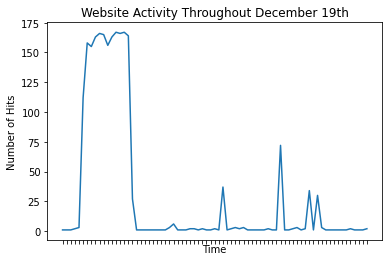

In [97]:
# Convert list of minutes to dataframe, then graph the activity of the site for each minute of the day

times_df = pd.DataFrame.from_dict(times_count, orient='index').reset_index()
times_df = times_df.rename(columns={'index':'time', 0:'count'})
plt.plot(times_df['time'], times_df['count'])
plt.xticks(rotation=90)
plt.title('Website Activity Throughout December 19th')
plt.xlabel('Time')
plt.ylabel('Number of Hits')
plt.tick_params(labelbottom=False)

# 
There was a huge spike in the number of hits on the website early in the morning where the site was constantly being accessed at once. To me, this seems like an automated process that is trying to alter the website in some way. Let's isolate the data to just those entries by our suspicious IP address and see what times they were accessing the site:

In [98]:
# Isolate all the entries that were made by the supocious IP Address

pattern7 = '148\.251\.50\.49\s\S+\s\S+\s\S+'
IPtimes = re.findall(pattern7, dec19)

In [99]:
#Write the Suspicious IP log entries to a text file

with open('SuspiciousIP.txt', 'w') as f:
    for item in IPtimes:
        f.write("%s\n" % item)

In [100]:
# Open Suspicious IP text file

with open(r'SuspiciousIP.txt', 'r') as file:
    suspicious_log =  file.read().replace('\n', ' ')

In [101]:
#Find each minute that the suspicious IP accessed the site

pattern8 = '(?<=:)\d{2}:\d{2}'
susIP = re.findall(pattern8, suspicious_log)
susIP_count = Counter(susIP)

Text(0, 0.5, 'Number of Hits')

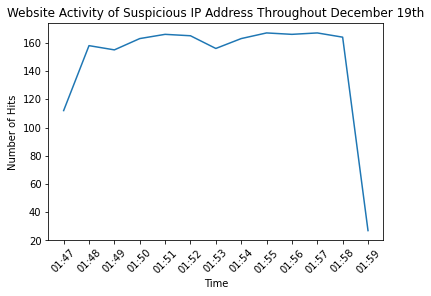

In [102]:
# Convert the list to a dataframe, graph the number of times the suspicious IP accessed the site based on the Minute

susIP_df = pd.DataFrame.from_dict(susIP_count, orient='index').reset_index()
susIP_df = susIP_df.rename(columns={'index':'time', 0:'count'})
plt.plot(susIP_df['time'], susIP_df['count'])
plt.xticks(rotation=45)
plt.title('Website Activity of Suspicious IP Address Throughout December 19th')
plt.xlabel('Time')
plt.ylabel('Number of Hits')
#plt.tick_params(labelbottom=False)

# 
We can see from this graph that all 1929 of the hits from this suspicious IP address came in the course of just over 12 minutes from 1:47 - 1:59 AM. This shows that it was definitely an automated activity, and is probably malicious activity